In [24]:
%load_ext autoreload
%autoreload 2
from evaluation_scripts.experiment_class import Experiment
from evaluation_scripts.aesthetics_class import Aesthetics
from evaluation_scripts.time_series_class import TimeSeries
from matplotlib import pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
models = {"val_sim.pkl":"val", "var_sim.pkl":"var"}
var_info = {"linewidth": 3,
          "blockwidth": 20,
           "entry":'variation sim (95% pi)'
          }
val_info = {"linewidth": 3,
           "entry":'validation sim'
          }
var_info = {"linewidth": 3,
          "blockwidth": 40,
           "entry":'variation sim (95% pi)'
          }
exp_info = {"entry":'exp data (mean, min, max)',
       "s":3}

style = Aesthetics(
    style = "white", 
    grid = True, 
    box=True,
    fontsize=30, 
    n = 1,
    legend_scale = 3,
    legend_size = 30)
style.time_series()
style.add_legend(exp_info, "exp")
style.add_legend(val_info, "val")
style.add_legend(var_info, "var")


In [26]:
mpl.rcParams["text.usetex"] = False

date = "20220412"
exp3 = Experiment(date)
scenario3 = TimeSeries(exp3)
scenario3.load_models(models)
scenario3.plot_all(style, sans_poisson = False, panel_style = True)
scenario3.save_figure(date+"_timeplot.pdf")

RuntimeError: latex was not able to process the following string:
b'$(A_r&B_r)$'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpiudymgfh 7a830a9f8f64ace1f2a9ea5c41fd3bf3.tex

This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./7a830a9f8f64ace1f2a9ea5c41fd3bf3.tex
LaTeX2e <2020-02-02> patch level 5
L3 programming layer <2020-03-06>
(/usr/local/texlive/2020/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/usr/local/texlive/2020/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2020/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/local/texlive/2020/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/local/texlive/2020/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2020/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/local/texlive/2020/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/local/texlive/2020/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2020/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2020/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/local/texlive/2020/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/local/texlive/2020/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/local/texlive/2020/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/local/texlive/2020/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file 7a830a9f8f64ace1f2a9ea5c41fd3bf3.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
(/usr/local/texlive/2020/texmf-dist/tex/latex/psnfss/ot1phv.fd

LaTeX Warning: Font shape declaration has incorrect series value `mc'.
               It should not contain an `m'! Please correct it.
               Found on input line 21.


LaTeX Warning: Font shape declaration has incorrect series value `mc'.
               It should not contain an `m'! Please correct it.
               Found on input line 24.


LaTeX Warning: Font shape declaration has incorrect series value `mc'.
               It should not contain an `m'! Please correct it.
               Found on input line 27.


LaTeX Warning: Font shape declaration has incorrect series value `mc'.
               It should not contain an `m'! Please correct it.
               Found on input line 47.

)
! Misplaced alignment tab character &.
l.30 {\sffamily $(A_r&
                      B_r)$}%
No pages of output.
Transcript written on tmpiudymgfh/7a830a9f8f64ace1f2a9ea5c41fd3bf3.log.




In [30]:
scenario3.summary.transfer_n.max()

14

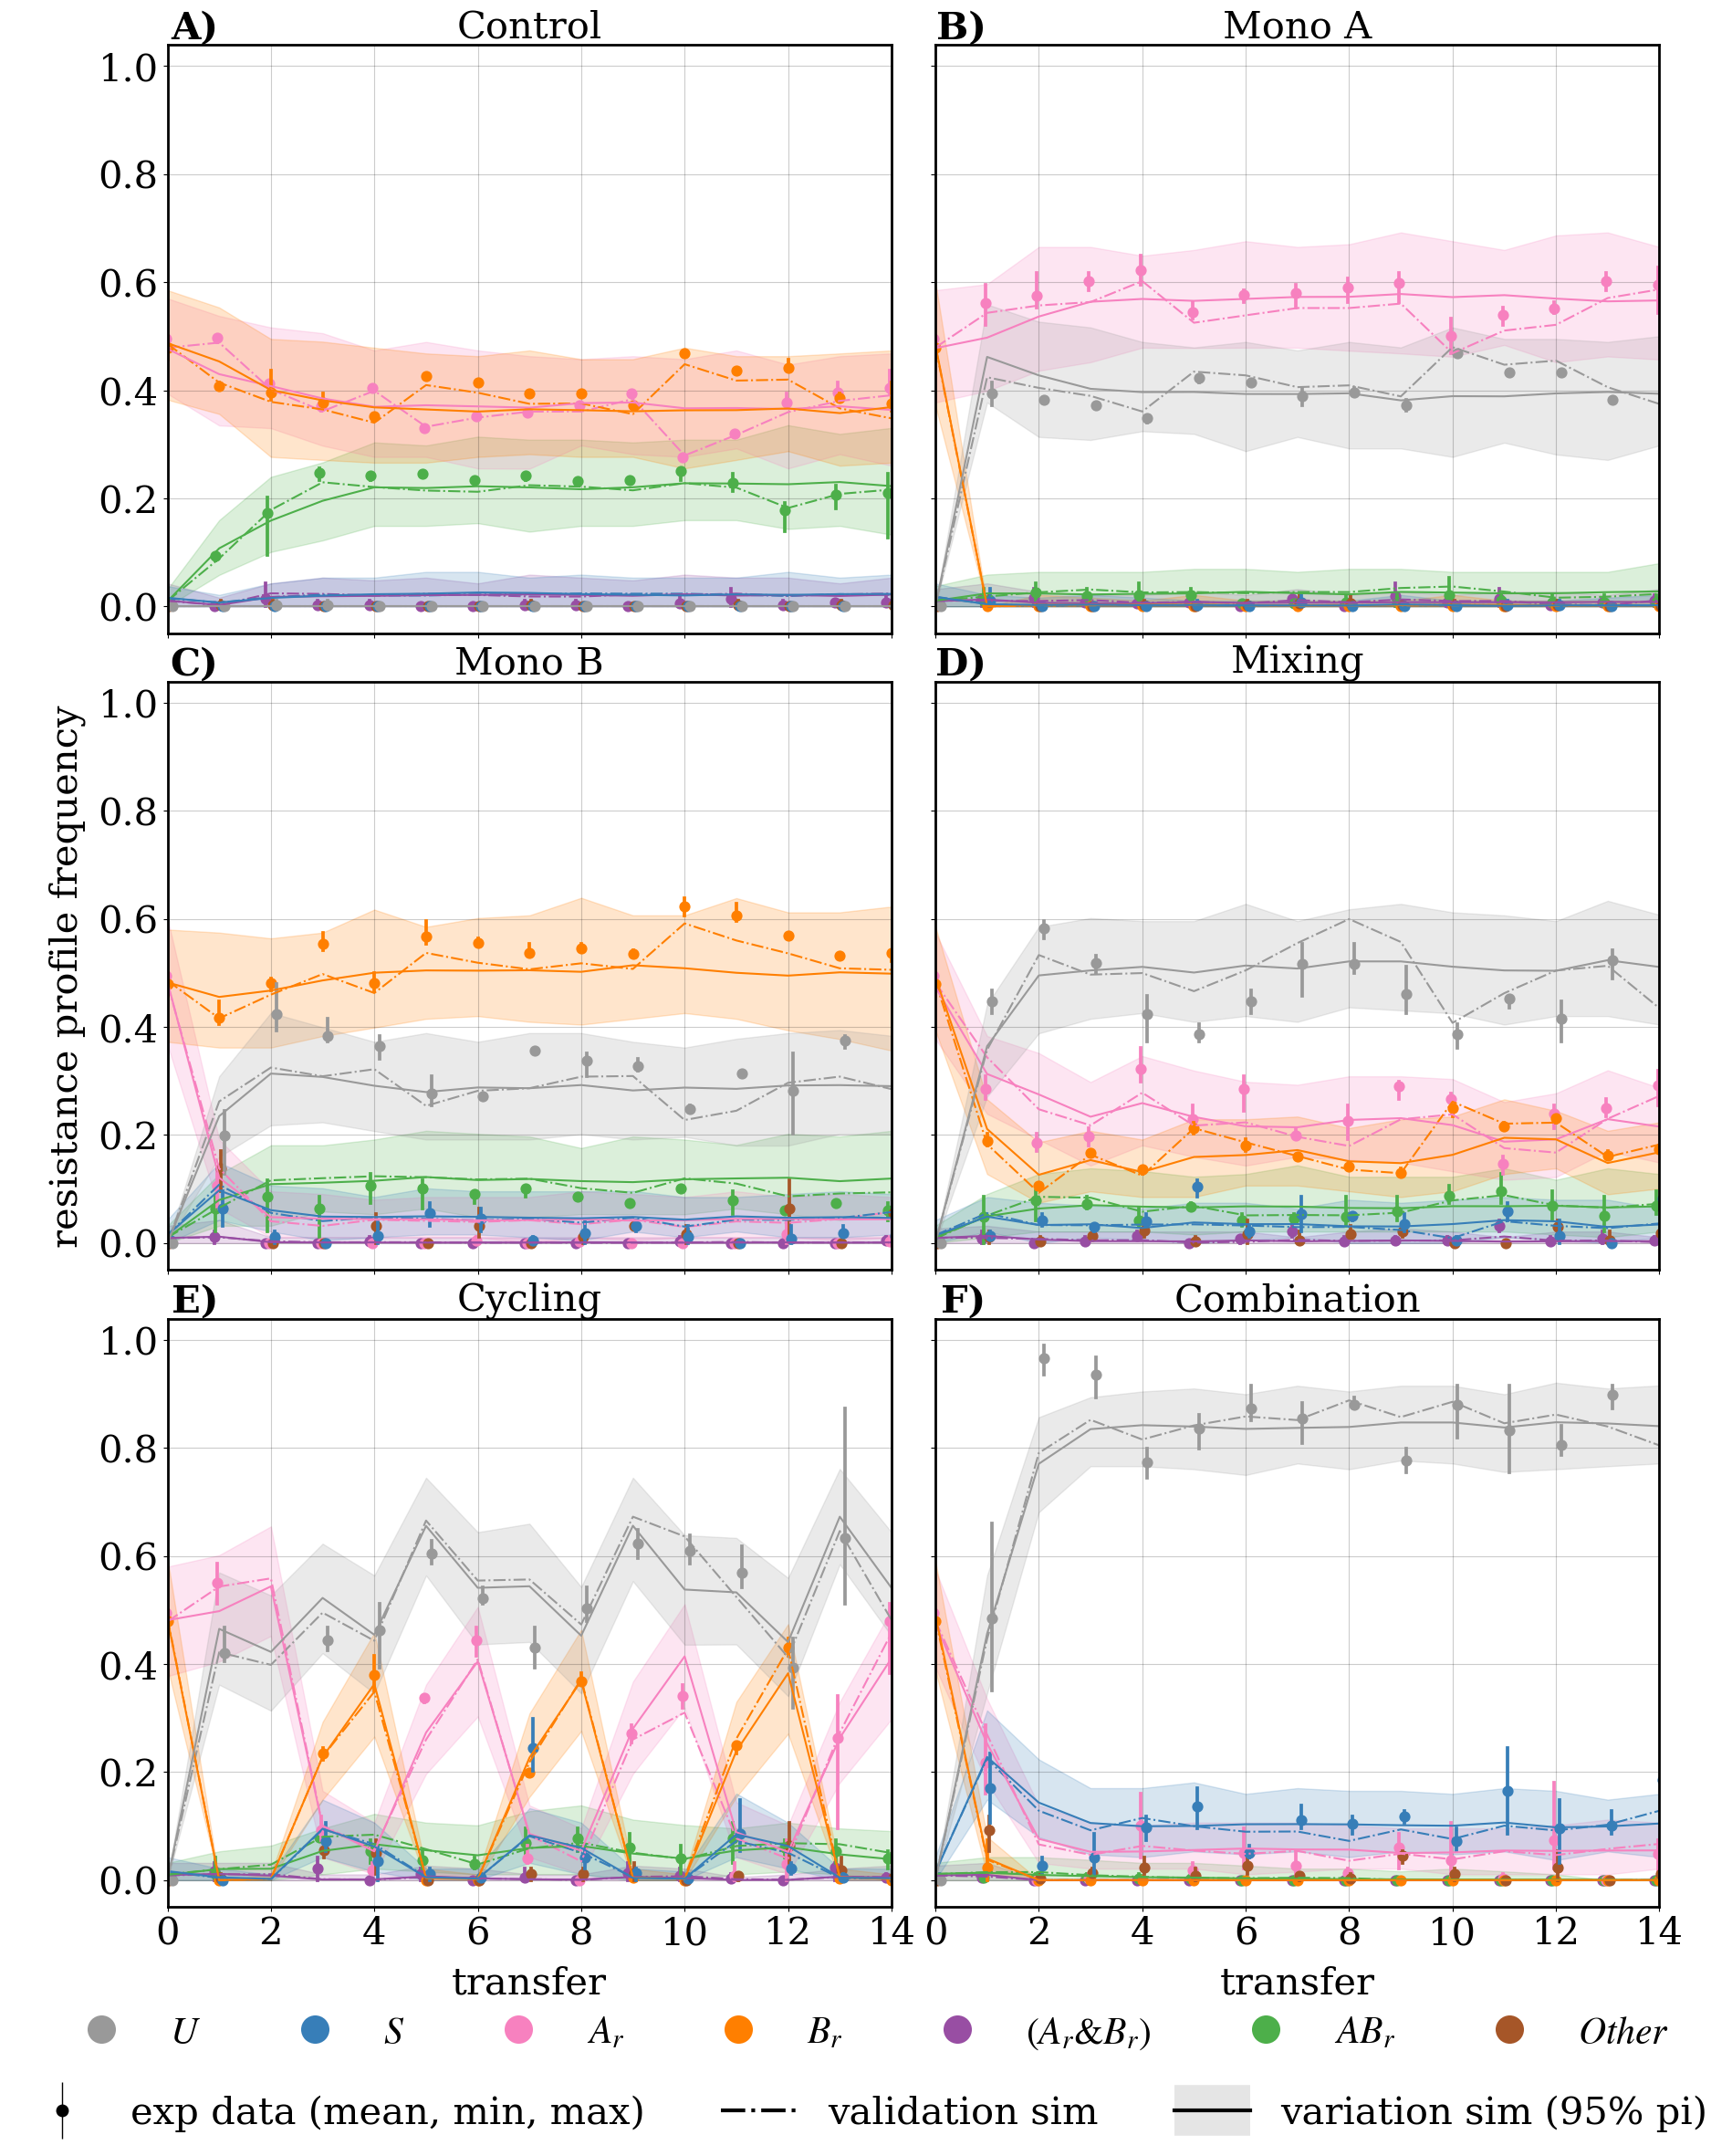

In [41]:
from figures import Figure, generate_style
from matplotlib.font_manager import FontProperties
import matplotlib as mpl

mpl.rcParams["text.usetex"] = False
fontsize = 30
paper_style  = generate_style(
    fontsize=fontsize, frontcolor="black", backcolor="white",
)
paper_style["frame"].update({"linewidth":2})
paper_style["rcParams"]['axes.titlesize']= fontsize

figure = Figure(paper_style)
scenario3.experiment.axs_dict = {'No treatment': (0, 0),
 'Mono A': (0, 1),
 'Mono B': (1, 0),
 'Mixing': (1, 1),
 'Cycling': (2, 0),
 'Combination': (2, 1)}

fig, axs = scenario3.plot_all(style, sans_poisson = False, panel_style = True, layout = (3,2), figsize=(18, 22),
        x_text=0.07,
        y_text=1.06,)

# Adjust y-labels and x-labels
axs[0, 0].set_ylabel(None)
axs[2, 0].set_ylabel(None)
font_props = FontProperties(
    family=paper_style["rcParams"].get("font.family", "sans-serif"),
    size=fontsize
)

# Apply the font properties to the ylabel
axs[1, 0].set_ylabel("resistance profile frequency", fontproperties=font_props)

#axs[1, 0].set_ylabel("resistance profile frequency", fontsize = paper_style["rcParams"]['axes.titlesize'])

for r in range(3):
    for c in range(2):
        if axs[r, c].get_title() == "No treatment":
            axs[r, c].set_title("Control")
        ax = axs[r,c]
        figure.reset_rcParams()
        figure.format_frame(ax)
        figure.format_ticks(ax, fontsize = fontsize)
        figure.format_labels(ax, fontsize = fontsize)
        figure.format_title(ax, fontsize = fontsize)
        figure.format_annotations(ax, fontsize = fontsize)
        figure.format_legend(ax, fontsize = fontsize)
        axs[r,c].set_xlim([0,scenario3.summary.transfer_n.max()])
    
fig.suptitle(None)  # This clears the title
fig.set_constrained_layout_pads(hspace=0, wspace=0)
scenario3.save_figure("scen3_paper.pdf")
plt.show()

In [5]:
style2 = Aesthetics(
    style = "white", 
    grid = True, 
    x_tick_space = 4,
    box=False, 
    fontsize=30, 
    n = 1,
    legend_scale = 3,
    legend_size = 20)
style2.time_series()
style2.add_legend(exp_info, "exp")
style2.add_legend(val_info, "val")
style2.add_legend(var_info, "var")

<Figure size 640x480 with 0 Axes>

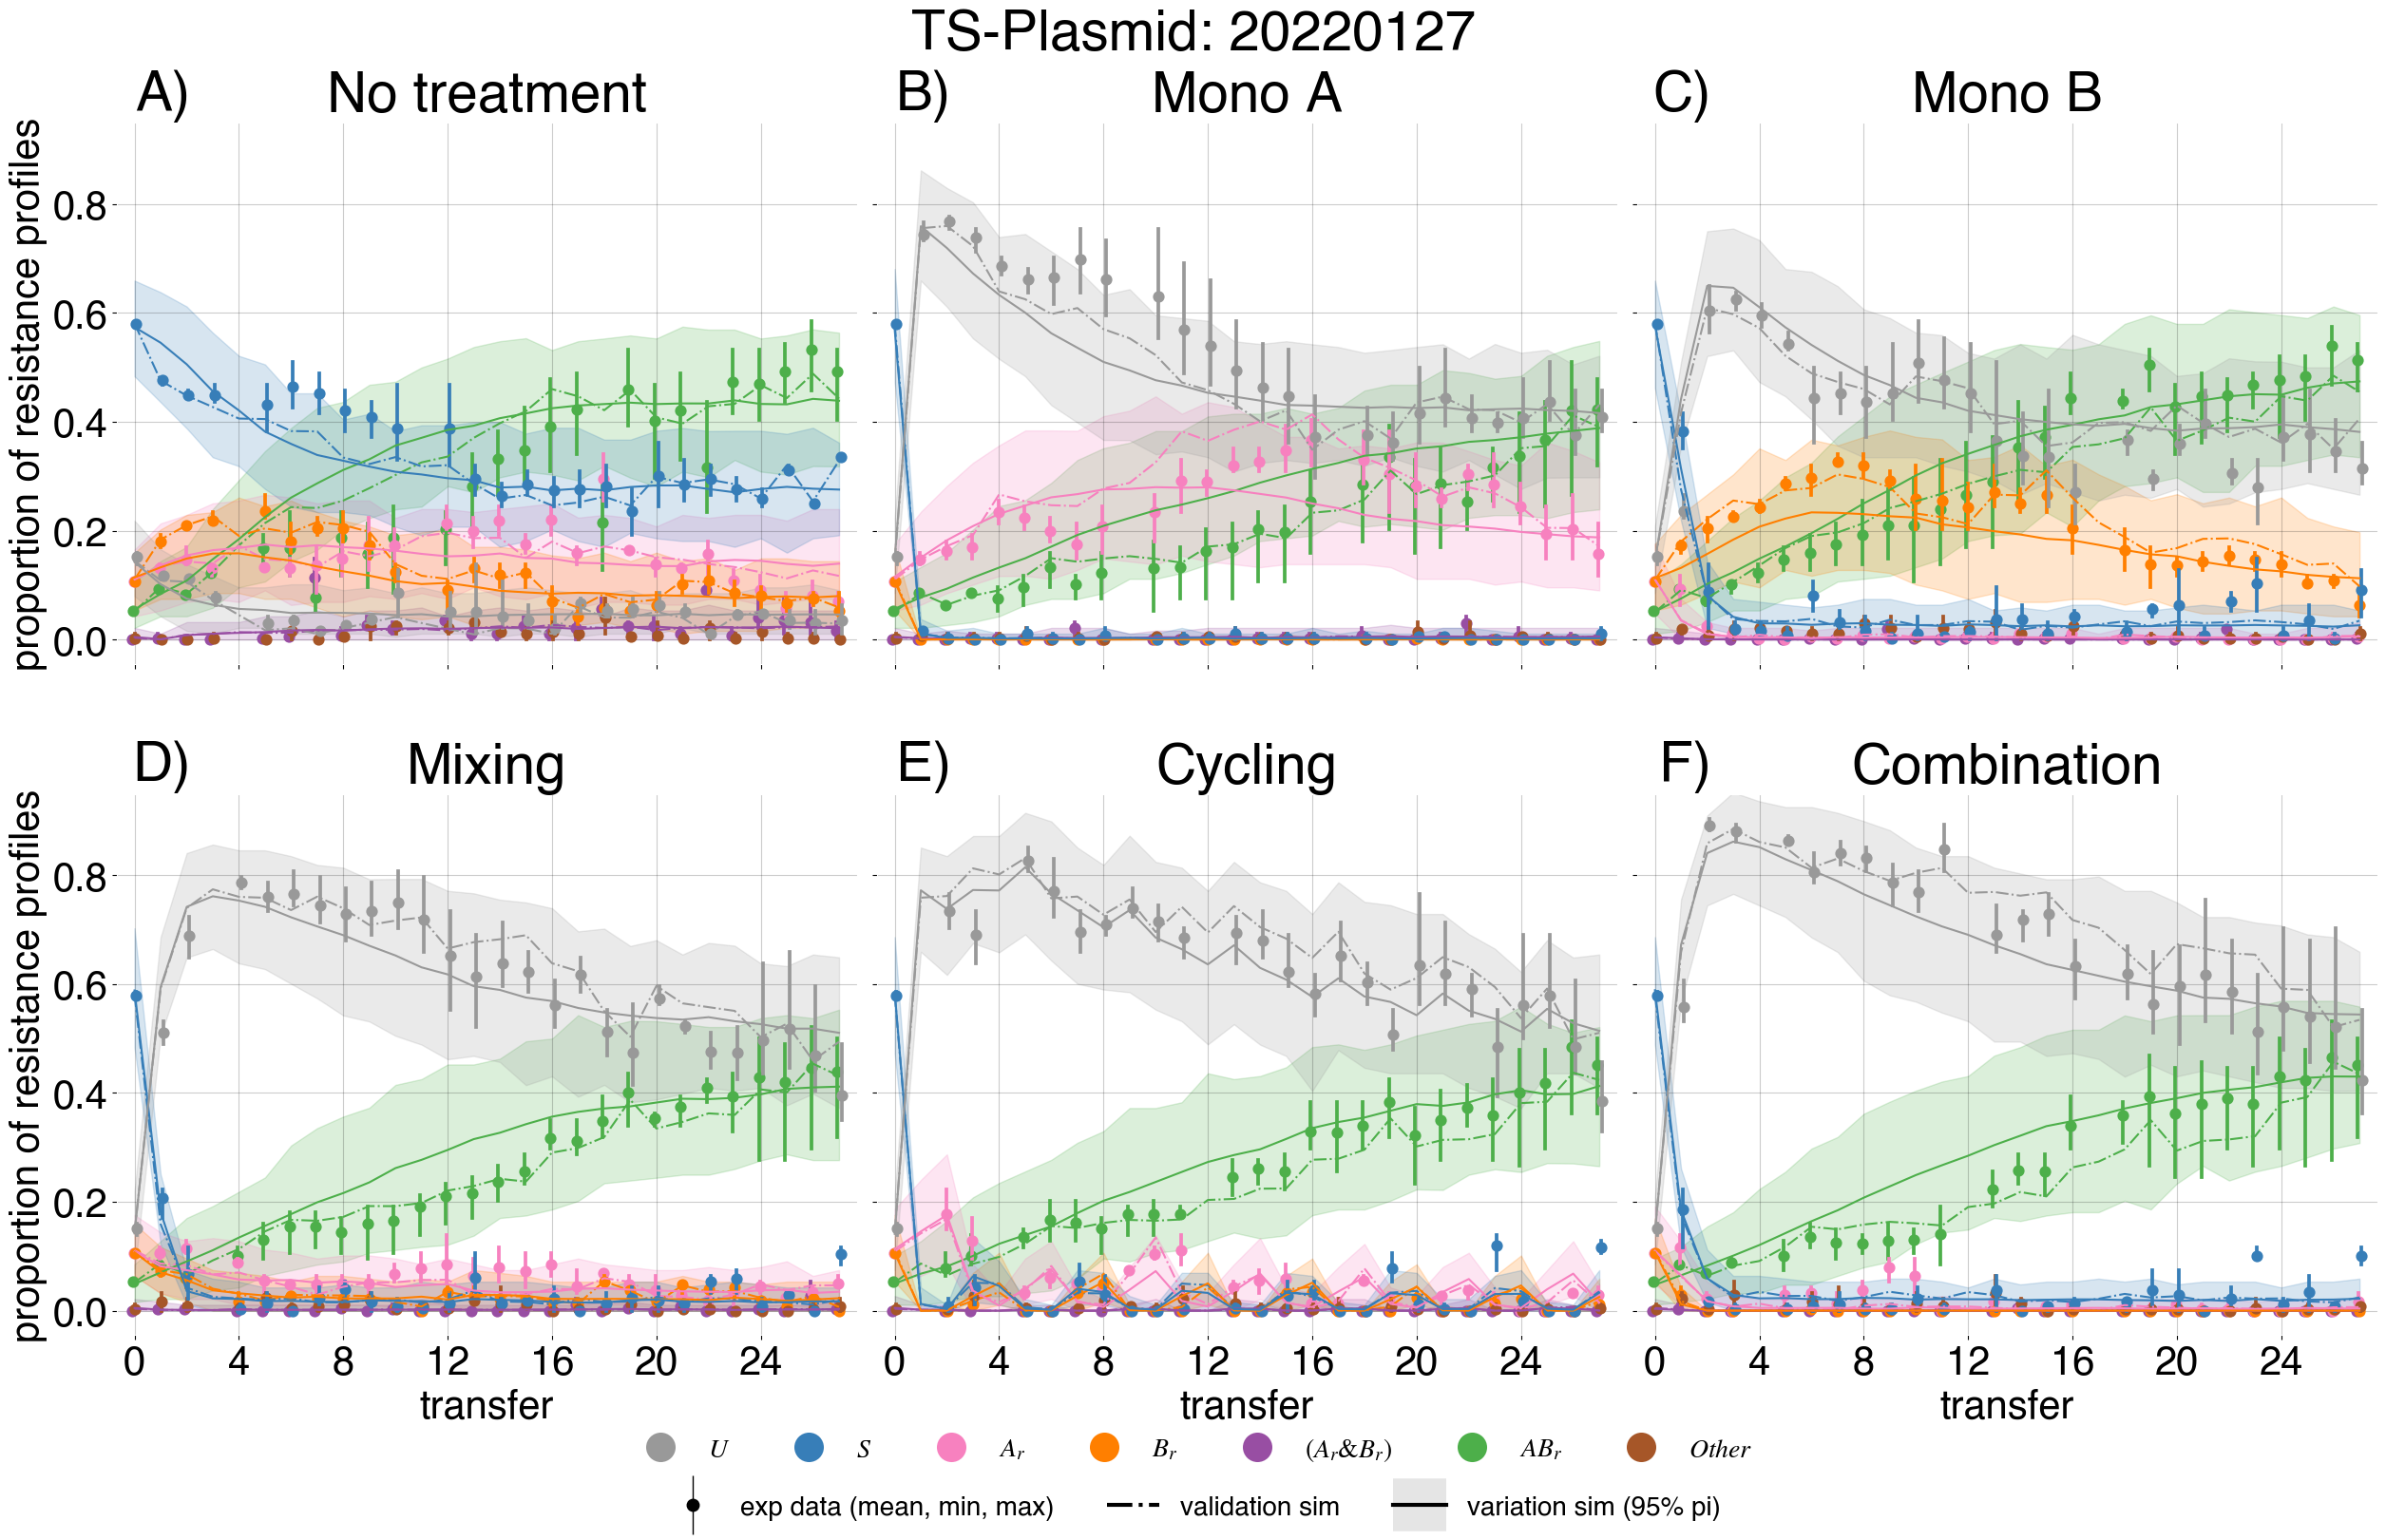

In [6]:
date = "20220127"
exp2 = Experiment(date)
scenario2 = TimeSeries(exp2)
scenario2.load_models(models)
scenario2.plot_all(style2, sans_poisson = False, panel_style = True)
scenario2.save_figure(date+"_timeplot.pdf")

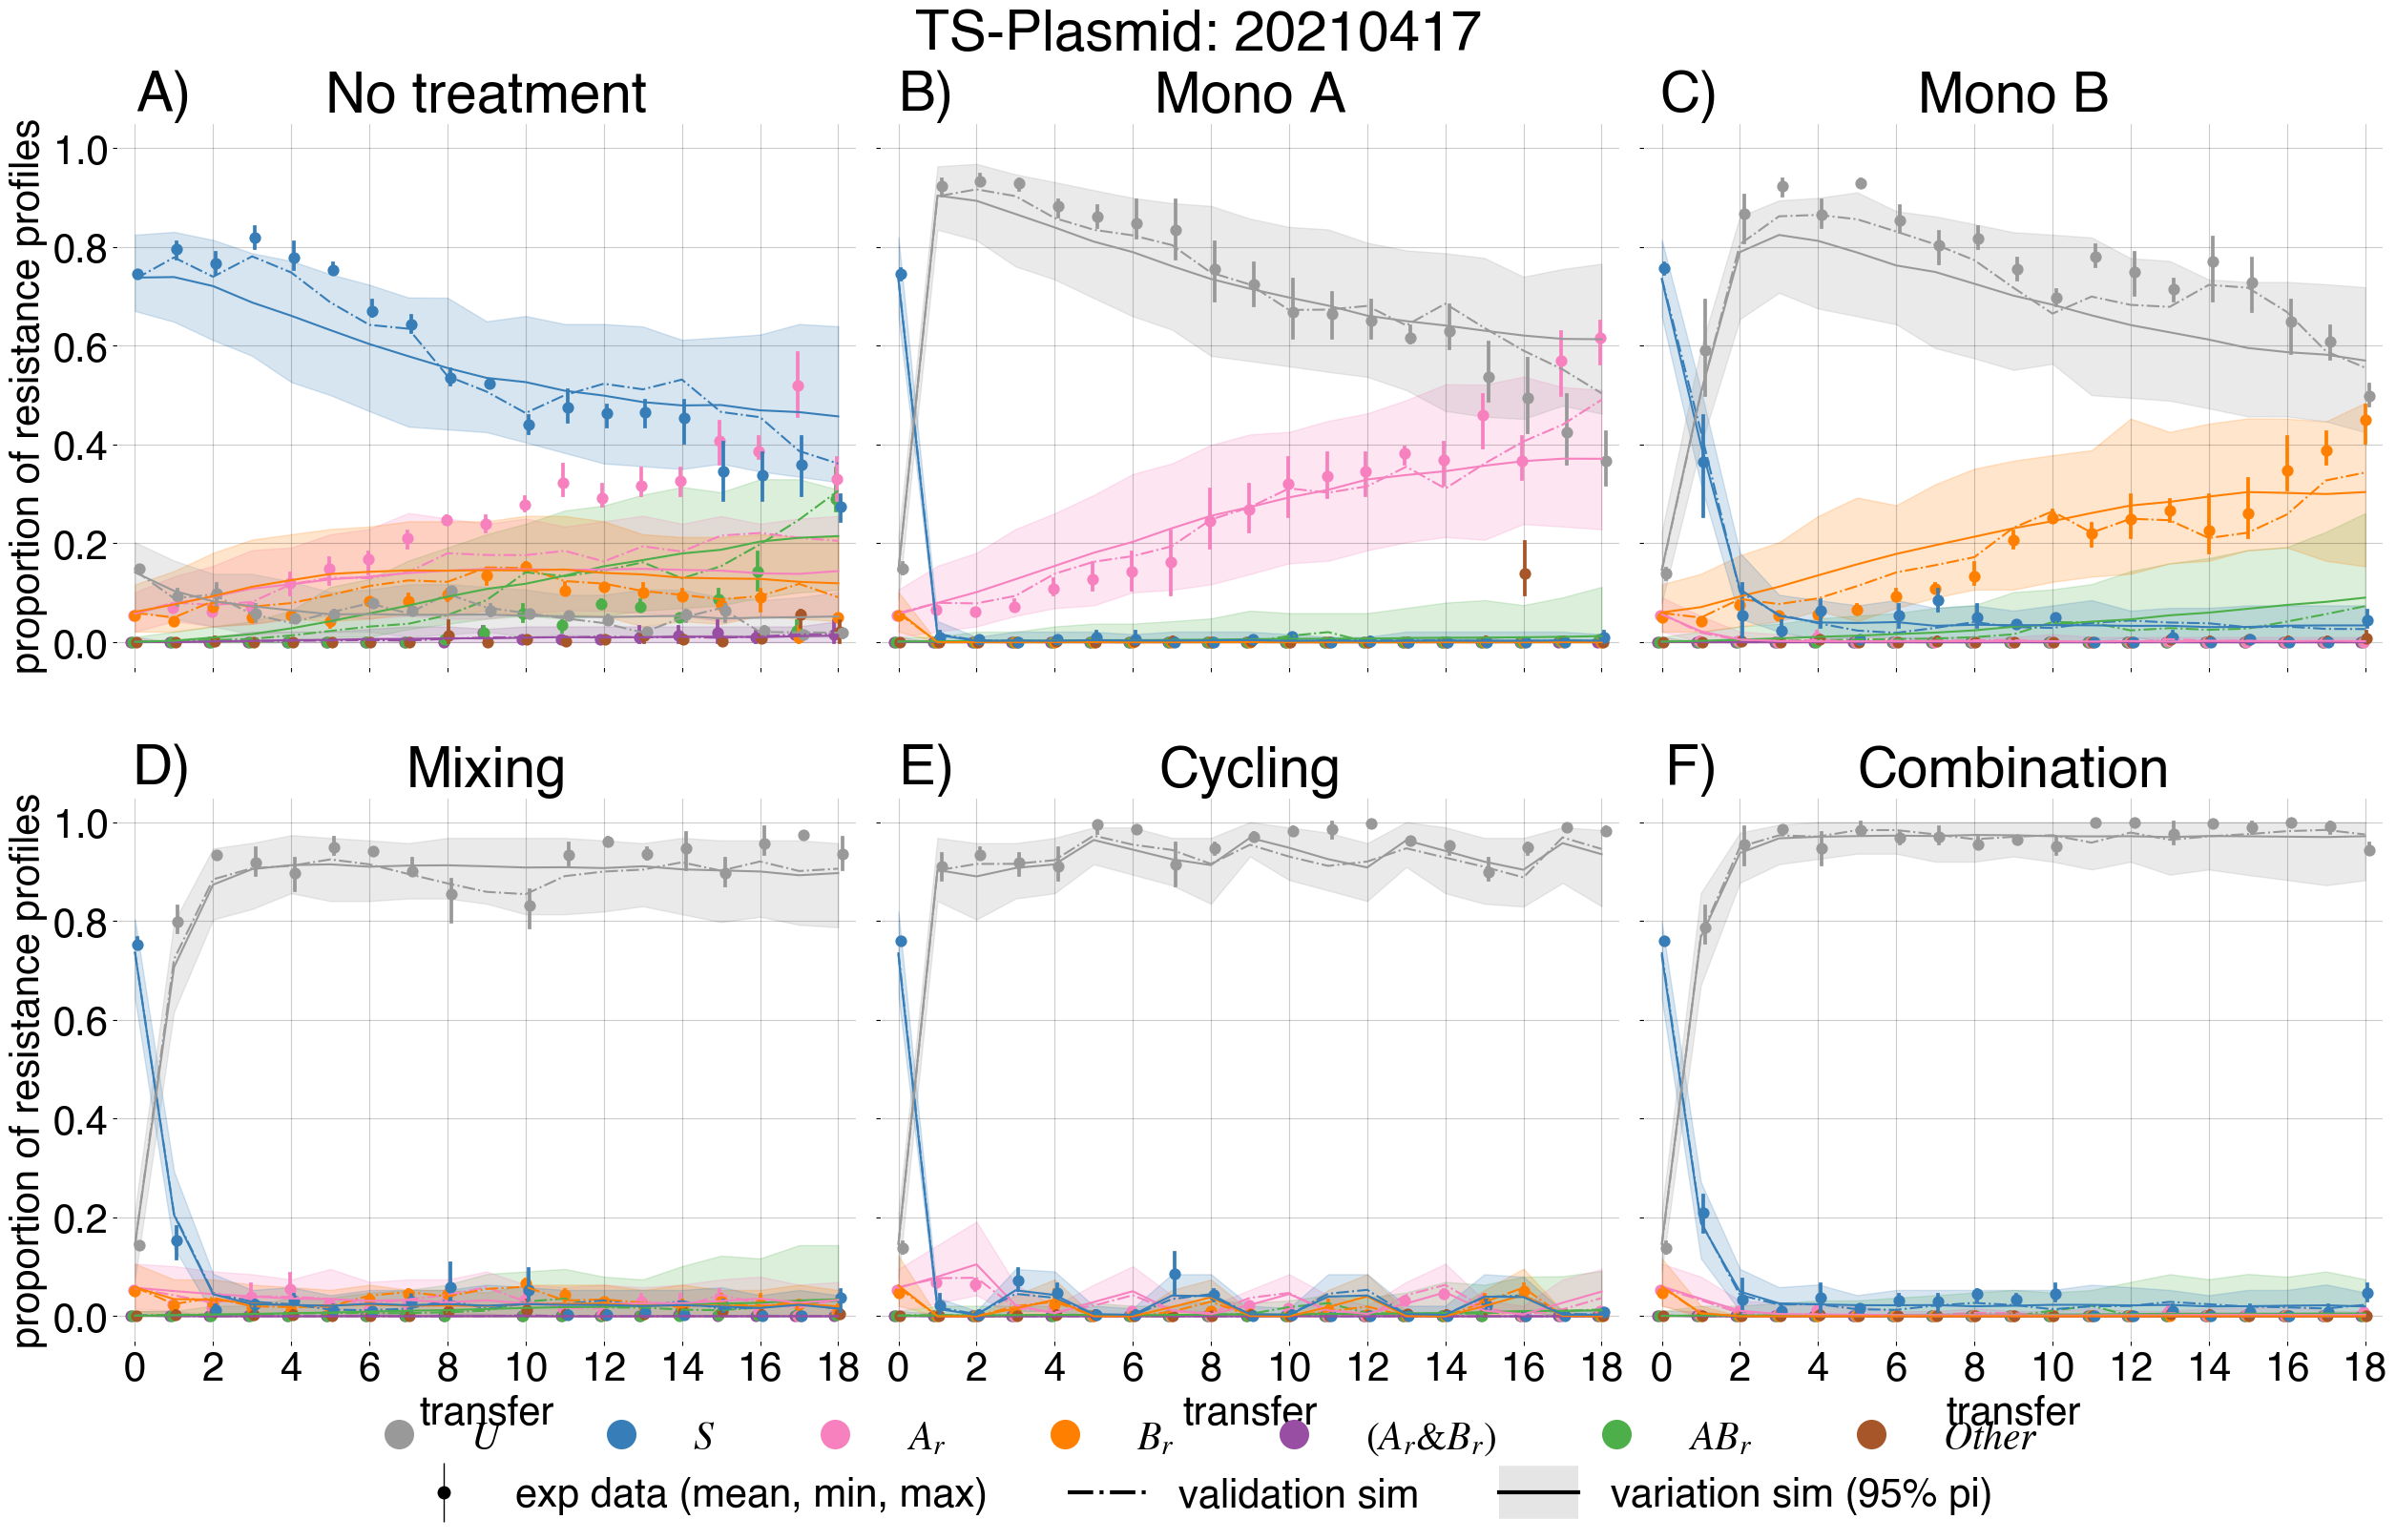

In [7]:
date = "20210417"
exp1 = Experiment(date)
scenario1 = TimeSeries(exp1)
scenario1.load_models(models)
scenario1.plot_all(style, sans_poisson = False, panel_style = True)
scenario1.save_figure(date+"_timeplot.pdf")

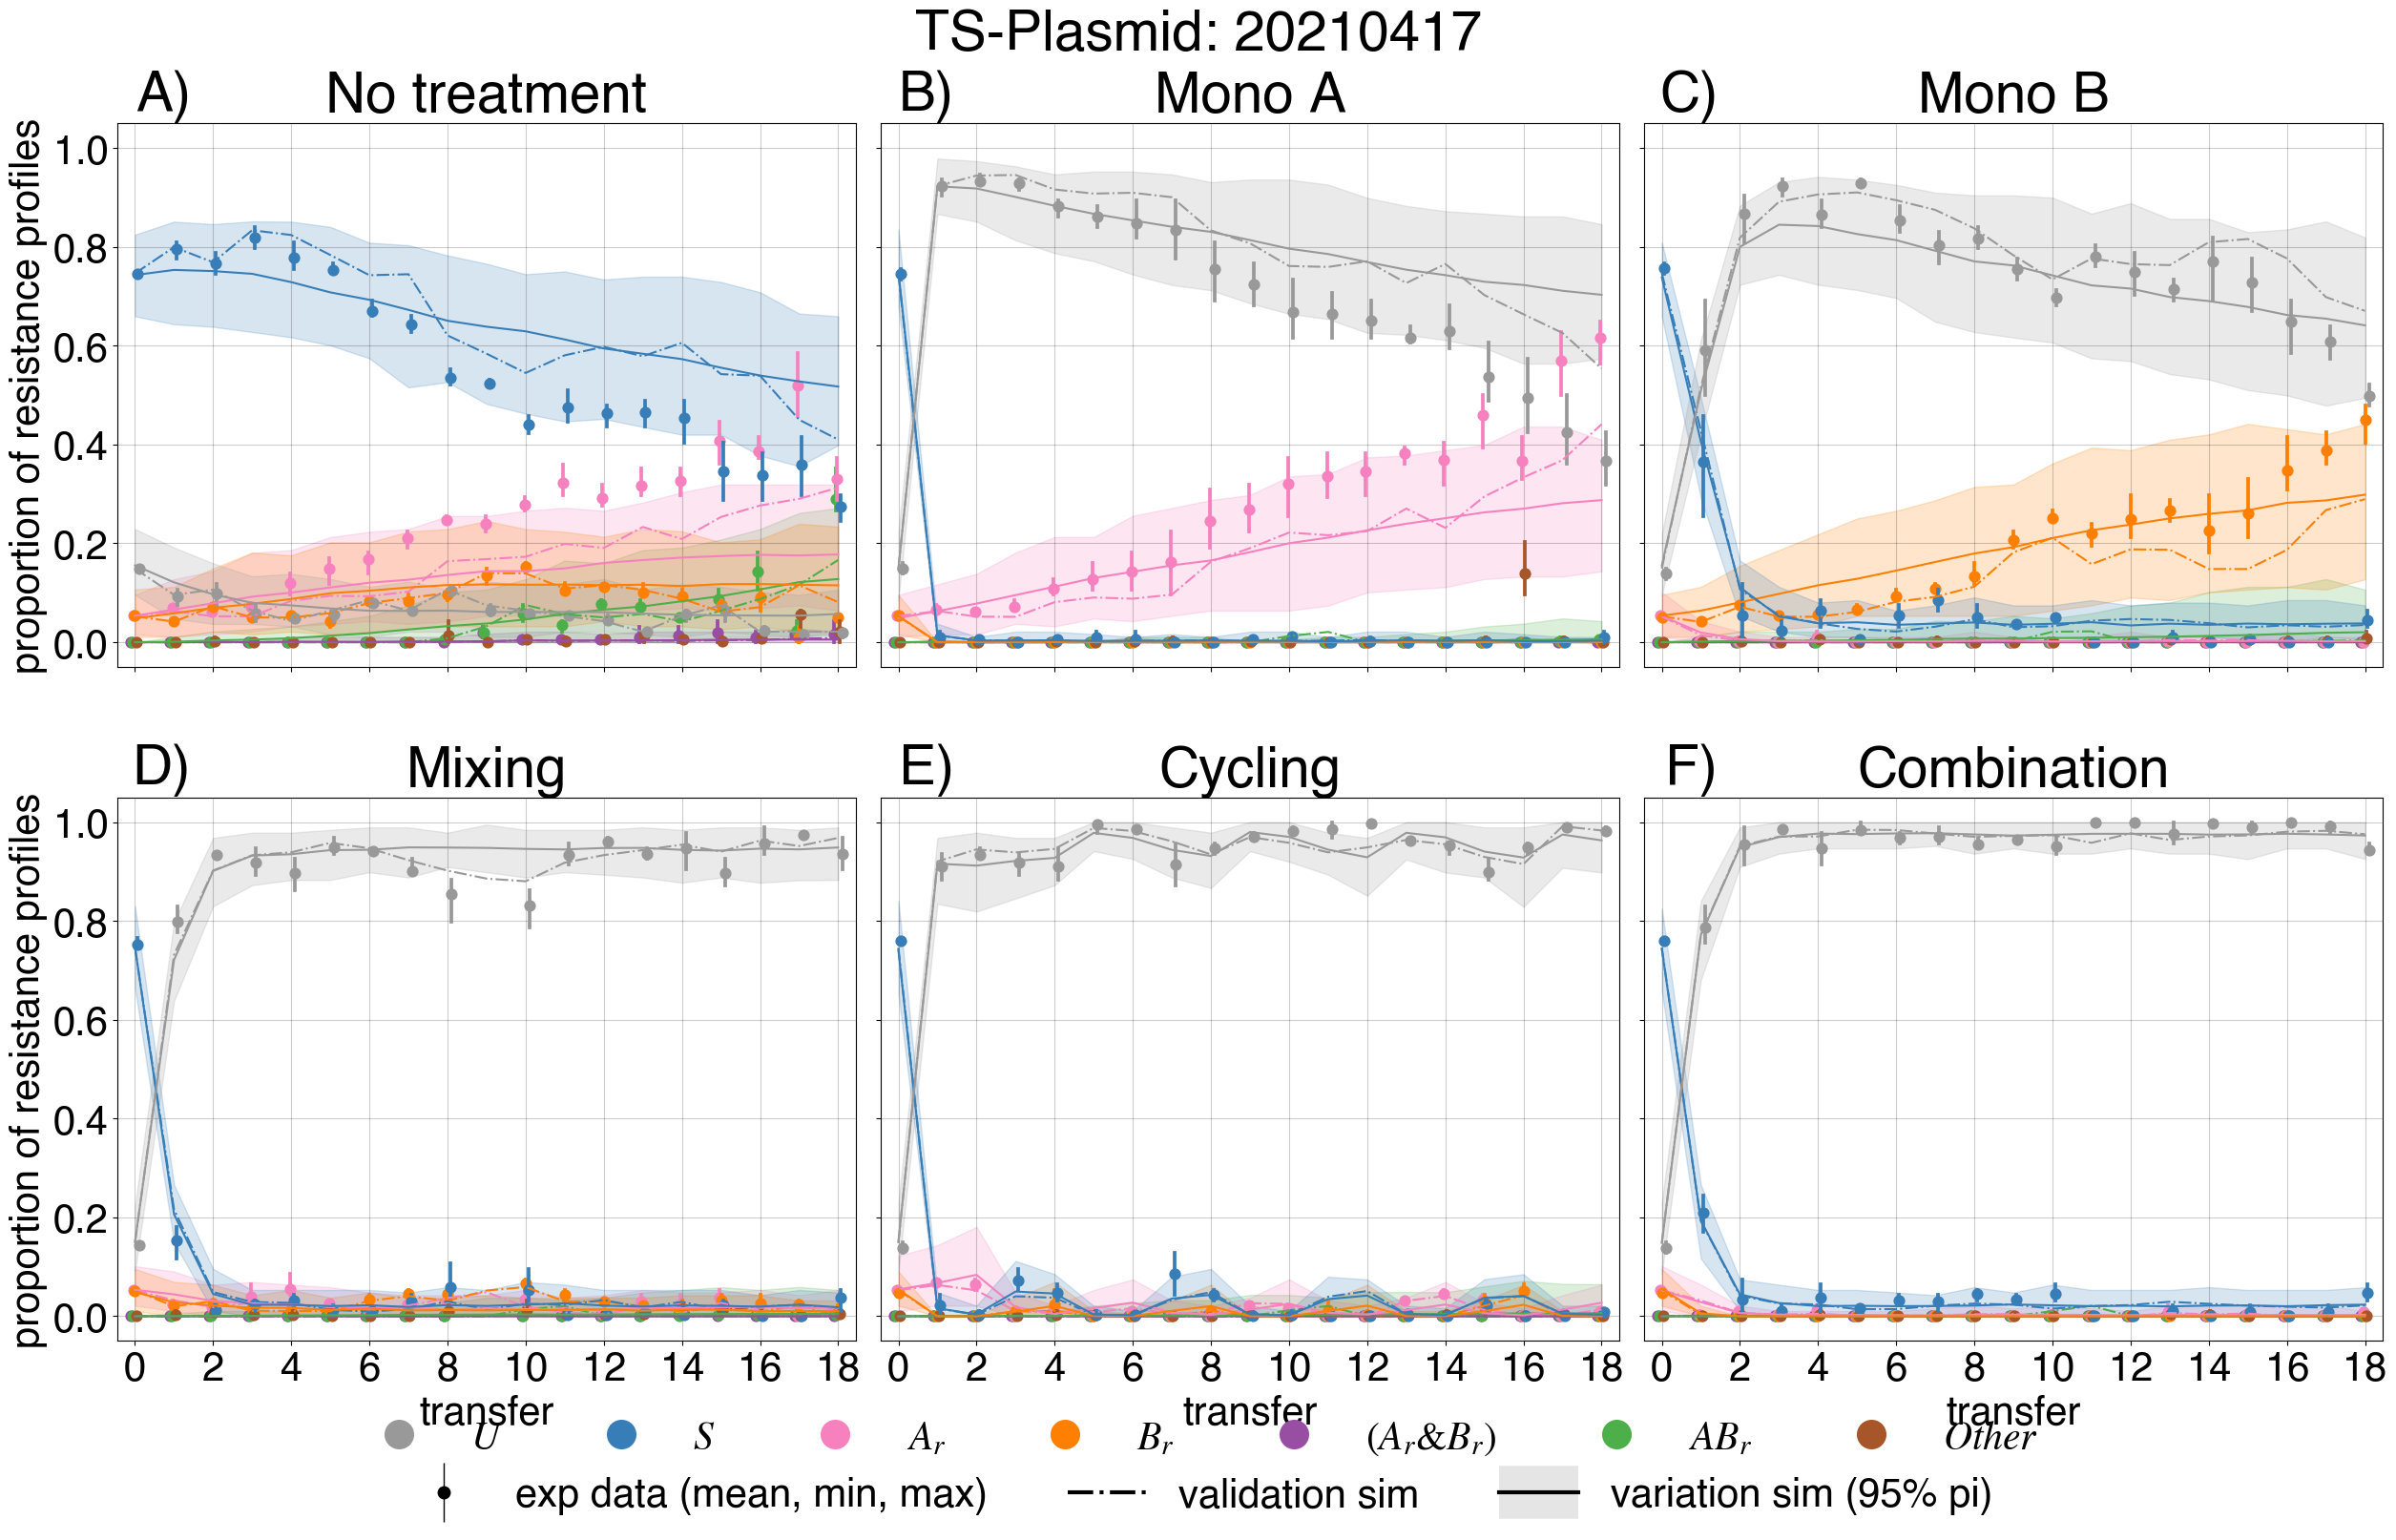

In [8]:
models = {"val_sim_clean.pkl":"val", "var_sim_clean.pkl":"var"}
exp1 = Experiment("20210417")
scenario1 = TimeSeries(exp1)
scenario1.load_models(models)
scenario1.plot_all(style, sans_poisson = False, panel_style = True)
scenario1.save_figure("20210417_timeplot_clean.pdf")

In [9]:
styleb = Aesthetics(
    style = "black", 
    grid = True, 
    box=False, 
    fontsize=30, 
    n = 3,
    legend_scale = 3,
    legend_size = 20)
styleb.time_series()
styleb.add_legend(exp_info, "exp")
styleb.add_legend(val_info, "val")
styleb.add_legend(var_info, "var")

<Figure size 640x480 with 0 Axes>

IndexError: index 2 is out of bounds for axis 0 with size 2

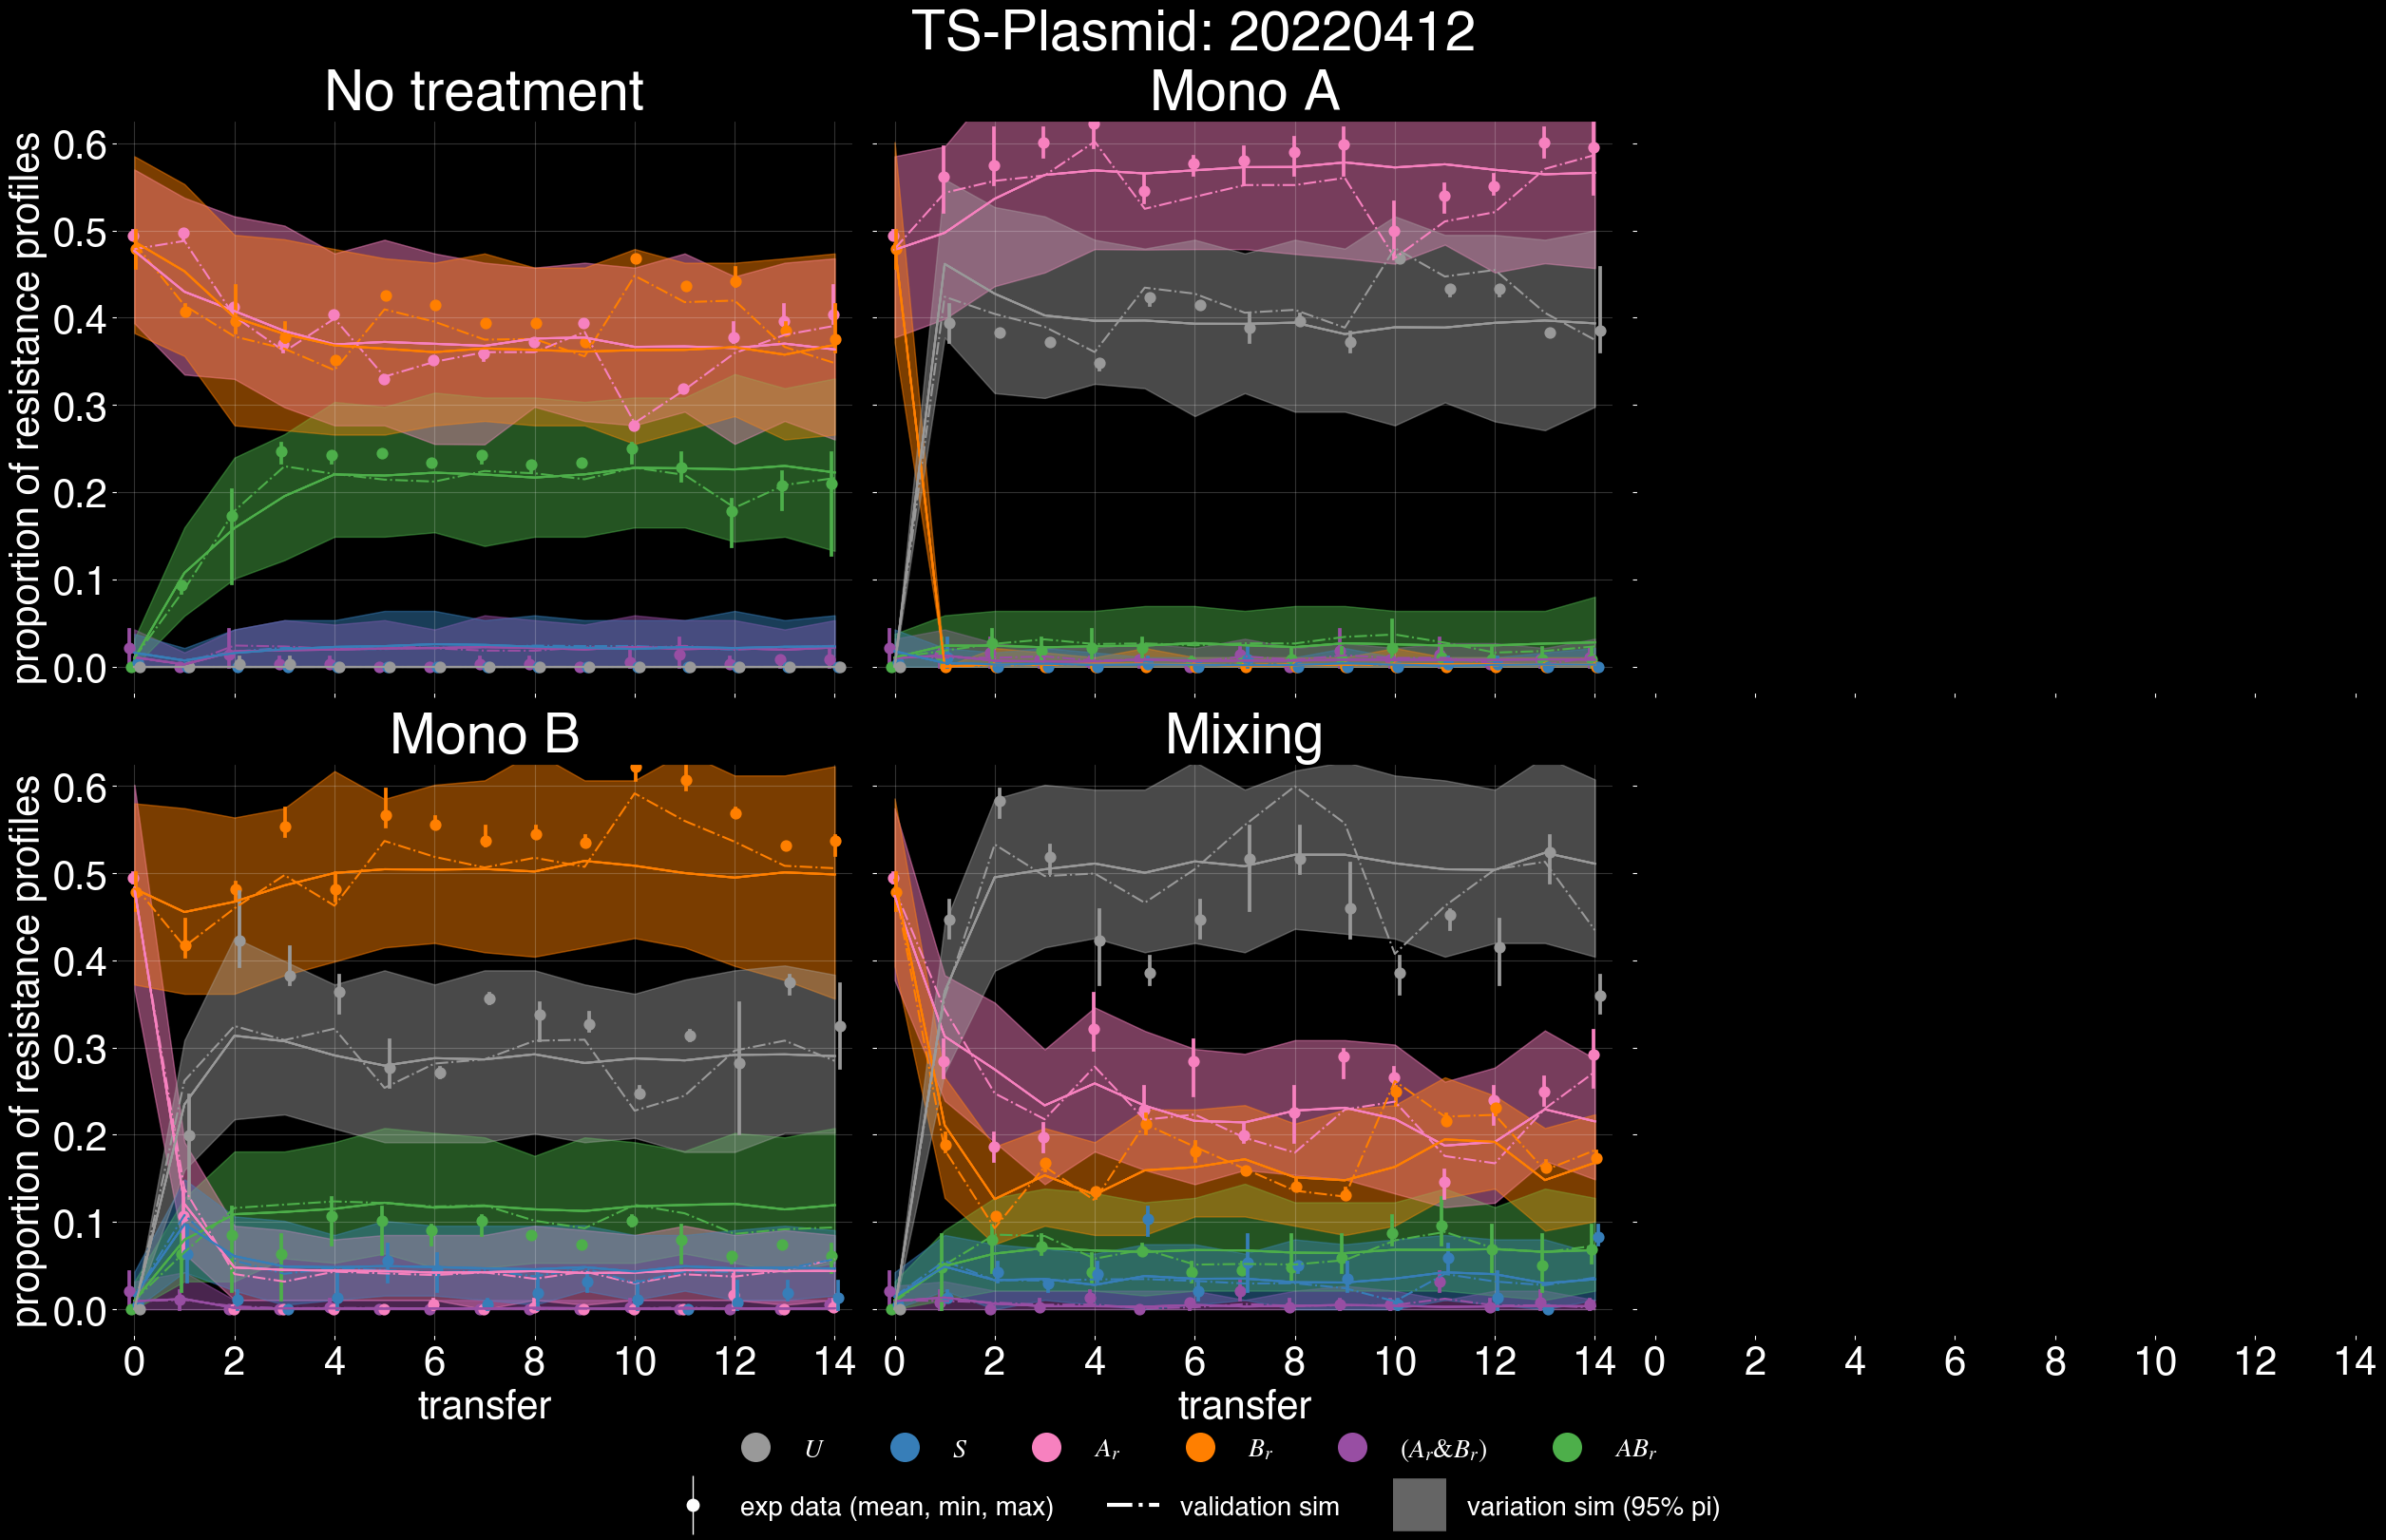

In [10]:
scenario3.plot_all(styleb)

In [ ]:
styleb2 = Aesthetics(
    style = "black", 
    grid = True, 
    box=False, 
    fontsize=30, 
    x_tick_space = 4,
    n = 3,
    legend_scale = 3,
    legend_size = 20)
styleb2.time_series()
styleb2.add_legend(exp_info, "exp")
styleb2.add_legend(val_info, "val")
styleb2.add_legend(var_info, "var")

In [ ]:
scenario2.plot_all(styleb2)

In [ ]:
scenario1.plot_all(styleb)

## Just Expiermental Data

In [ ]:
tsp1 = TimeSeries(exp1)
tsp1.plot_all(style)